<a href="https://colab.research.google.com/github/Sejalmishra123/Time-Series-Data-Analysis/blob/main/Sejal3(Time_series_analysis(using_model)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib.pyplot import rc
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [ ]:
df=pd.read_csv('/content/archive (19).zip')
#parse string to datetime type
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
indexeddf=df.set_index(['Month'])


In [ ]:
from datetime import datetime
indexeddf.tail(5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


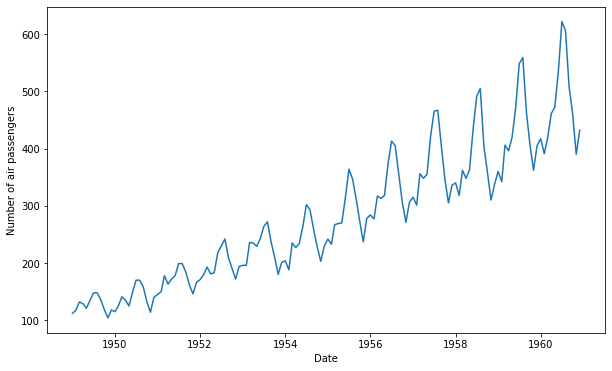

In [ ]:
#plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexeddf)

In [ ]:
#Determing rolling statistics
rolmean=indexeddf.rolling(window=12).mean()
rolstd=indexeddf.rolling(window=12).std()
print(rolmean,rolstd)


            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


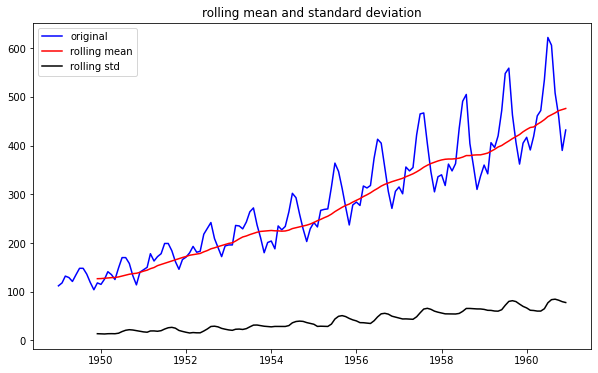

In [ ]:
from numpy.core.shape_base import block
#plot rolling statistics
orig=plt.plot(indexeddf,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

In [ ]:
#perform dickey-fuller test:
from statsmodels.tsa.stattools import adfuller

print('result of dickey-fuller test')
dftest=adfuller(indexeddf['#Passengers'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['test statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
  dfoutput['critical value(%s) '%key]=value

  print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


result of dickey-fuller test
test statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
critical value(1%)              -3.481682
dtype: float64
test statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
dtype: float64
test statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
critical value(10%)             -2.578770
dtype: float64


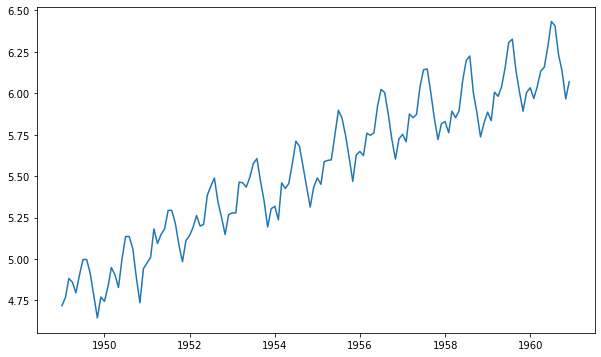

In [ ]:
#estimating trend
indexeddf_logScale=np.log(indexeddf)
plt.plot(indexeddf_logScale)

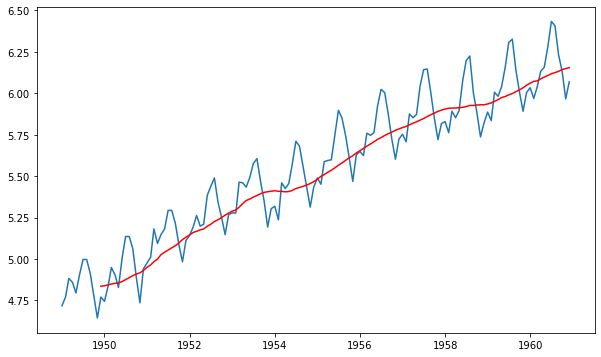

In [ ]:
movingAverage=indexeddf_logScale.rolling(window=12).mean()
movingSTD=indexeddf_logScale.rolling(window=12).std()
plt.plot(indexeddf_logScale)
plt.plot(movingAverage,color='red')


In [ ]:
dfLogScaleMinusmovingAverage=indexeddf_logScale-movingAverage
dfLogScaleMinusmovingAverage.head(12)

#remove null values
dfLogScaleMinusmovingAverage.dropna(inplace=True)
dfLogScaleMinusmovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [ ]:

def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#test_stationarity(datasetLogScaleMinusMovingAverage)

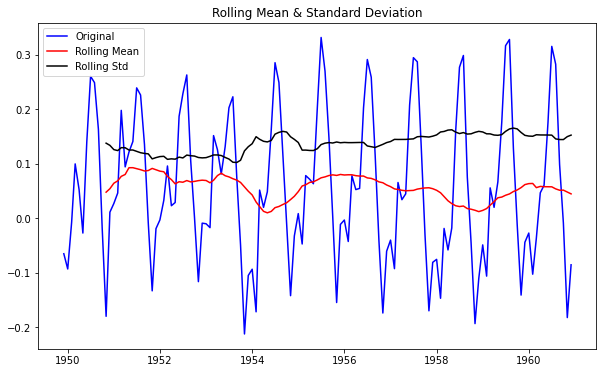

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
test_stationarity(dfLogScaleMinusmovingAverage)

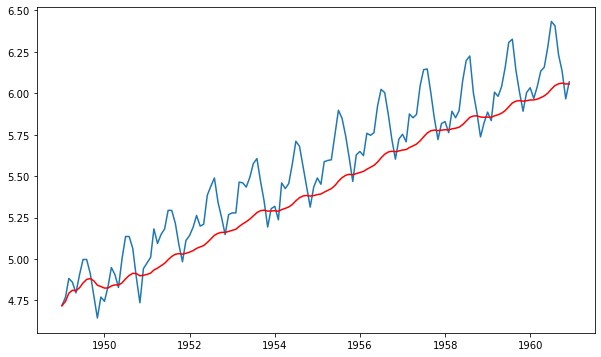

In [ ]:
exponentialDecayWeightedAverage=indexeddf_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexeddf_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

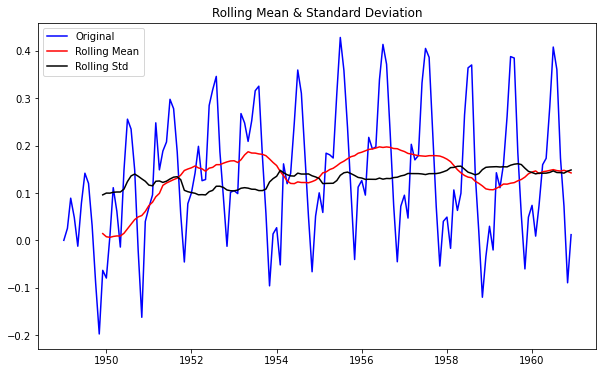

Results of Dickey Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
dfLogScaleMinusmovingexponentialDecayAverage=indexeddf_logScale - exponentialDecayWeightedAverage
test_stationarity(dfLogScaleMinusmovingexponentialDecayAverage)

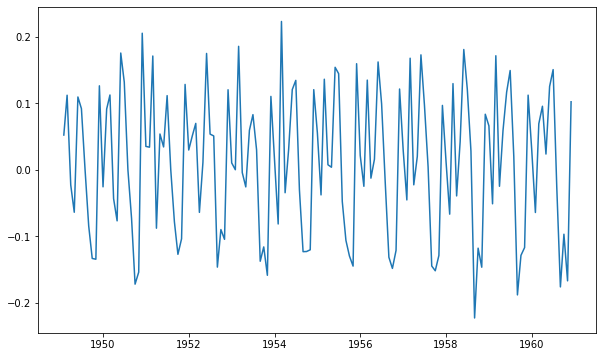

In [ ]:
dfLogDiffShifting = indexeddf_logScale - indexeddf_logScale.shift()
plt.plot(dfLogDiffShifting)

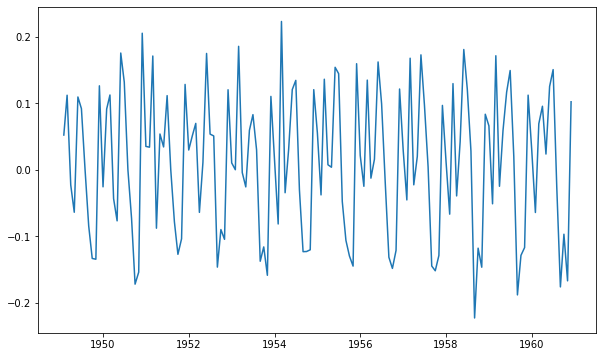

In [ ]:
dfLogDiffShifting.dropna(inplace=True)
plt.plot(dfLogDiffShifting)

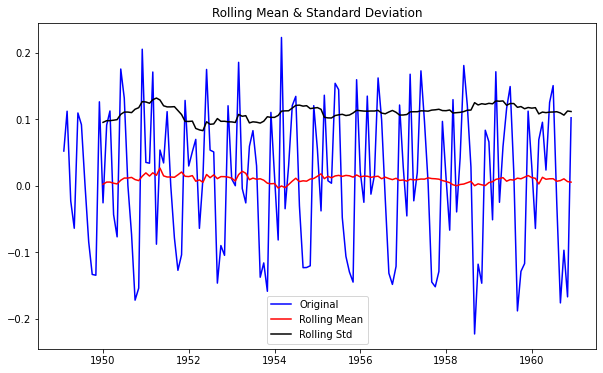

Results of Dickey Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
test_stationarity(dfLogDiffShifting)

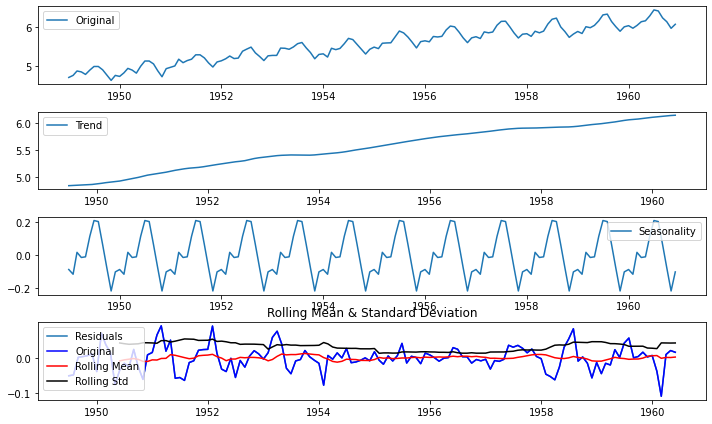

Results of Dickey Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeddf_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexeddf_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

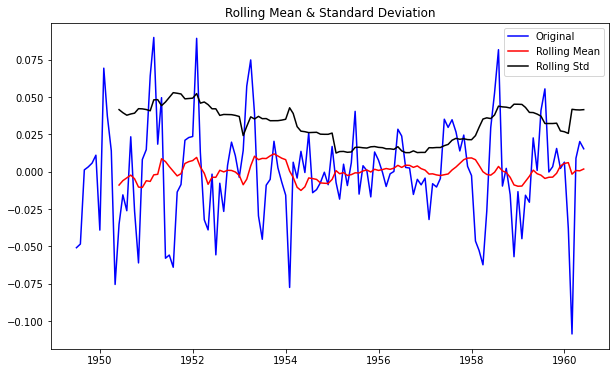

Results of Dickey Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


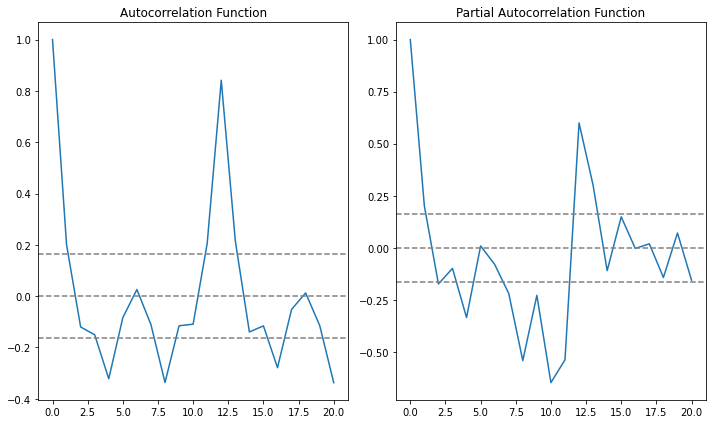

In [ ]:
#ACF and PACF Plots:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(dfLogDiffShifting, nlags=20)
lag_pacf = pacf(dfLogDiffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


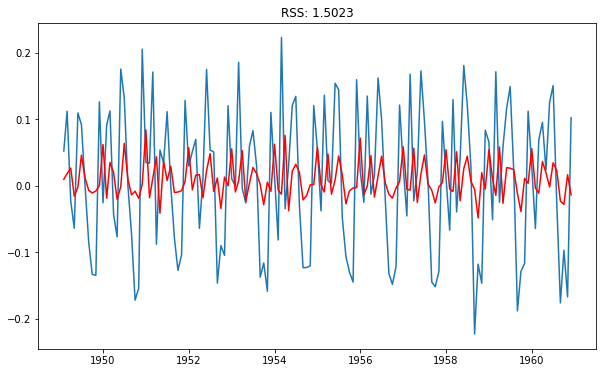

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(indexeddf_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - dfLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


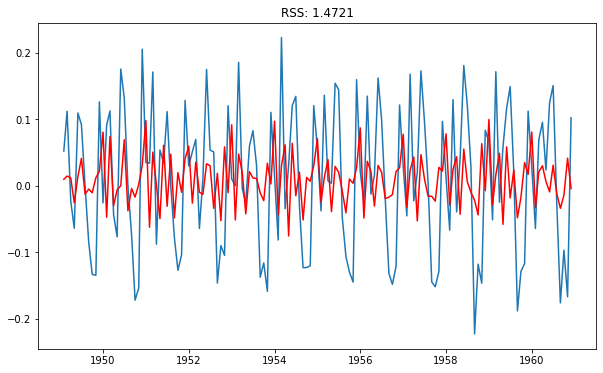

In [ ]:
#MA model
model = ARIMA(indexeddf_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - dfLogDiffShifting['#Passengers'])**2))
print('Plotting MA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


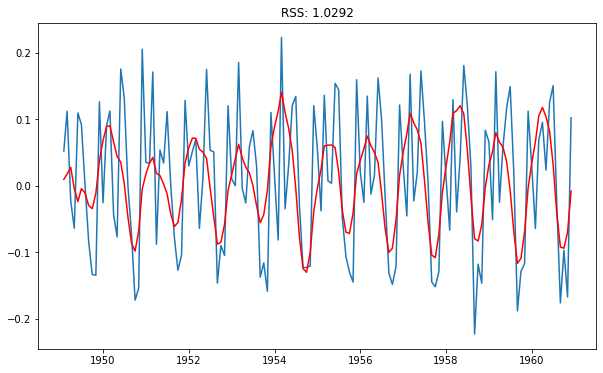

In [ ]:
model = ARIMA(indexeddf_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - dfLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

In [ ]:
#convert to cumulative sum

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [ ]:
predictions_ARIMA_log = pd.Series(indexeddf_logScale['#Passengers'].iloc[0], index=indexeddf_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

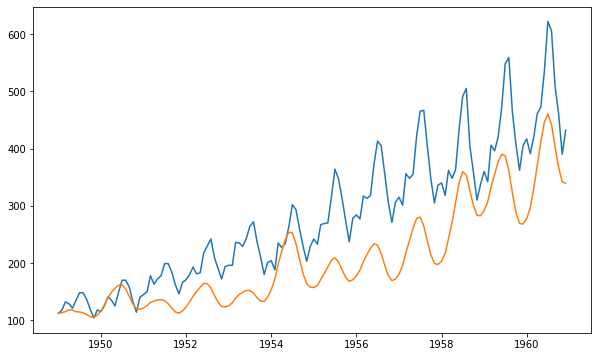

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexeddf)
plt.plot(predictions_ARIMA)

In [ ]:
indexeddf_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


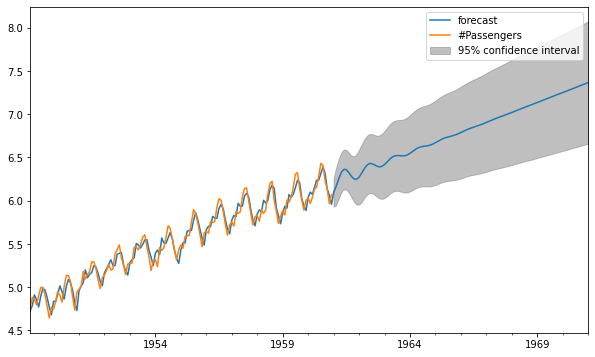

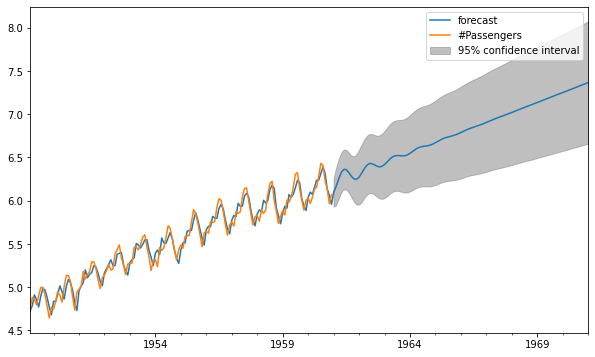

In [ ]:
results_ARIMA.plot_predict(1,264)

In [ ]:
results_ARIMA.forecast(steps=120)

(array([6.09553389, 6.15281393, 6.22442948, 6.29241076, 6.34164688,
        6.36359335, 6.35784666, 6.33139295, 6.29597541, 6.26447722,
        6.24738335, 6.25025176, 6.27275831, 6.30940294, 6.35151464,
        6.38988618, 6.41727342, 6.4301102 , 6.42906664, 6.41842474,
        6.4045615 , 6.39403616, 6.39183083, 6.40019498, 6.41833678,
        6.44295382, 6.46937401, 6.49293946, 6.51024079, 6.51988998,
        6.5226755 , 6.52112367, 6.51864513, 6.51853679, 6.52311911,
        6.53322344, 6.54812846, 6.56591526, 6.58410271, 6.60036499,
        6.61313226, 6.62192744, 6.62737757, 6.63093102, 6.63438666,
        6.63937964, 6.64696482, 6.65739815, 6.67015294, 6.68414215,
        6.69806586, 6.71077859, 6.7215769 , 6.73033944, 6.73749774,
        6.74386345, 6.75037292, 6.75782562, 6.7666865 , 6.77699789,
        6.78841281, 6.80032812, 6.81207151, 6.82308715, 6.83307091,
        6.84202449, 6.85022271, 6.85811181, 6.86617301, 6.87479112,
        6.88416263, 6.89426342, 6.90487845, 6.91